In [71]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

# Assignment 2: Voting Classifiers and Random Forests

In this project, a *voting classifier* will be examined with the *Diagnostic Wisconsin Breast Cancer Database* in order to investigate effective models for malignant tumour detection

# Voting Classifier: The *Diagnostic Wisconsin Breast Cancer Database*

## Data Preparation


In [72]:
data = pd.read_csv('wdbc.data', header=None)

# Column 0 is the ID, which is not need for classification
# Column 1 is the diagnosis, needed as the label of the classification
# 2 - 11 are mean values
# 12 - 21 are standard error
# 22 - 31 are worst

# Dropping the ID column
data.drop(columns=[0], inplace=True)

# Naming the columns
data.columns = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
               'smoothness_mean','compactness_mean','concavity_mean','concave_points_mean',
               'symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se',
               'area_se','smoothness_se','compactness_se','concavity_se','concave_points_se',
               'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
               'area_worst','smoothness_worst','compactness_worst','concavity_worst',
               'concave_points_worst','symmetry_worst','fractal_dimension_worst']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [73]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

labels = data.iloc[:, 0].values

labels = pd.DataFrame(labels, columns=["diagnosis"])

print("-------- Labels head (5) --------")

print(labels.head(5))

-------- Labels head (5) --------
  diagnosis
0         M
1         M
2         M
3         M
4         M


In [74]:

enc = OrdinalEncoder(categories=[["B", "M"]])
labels_encoded = enc.fit_transform(labels)
labels_encoded = np.reshape(labels_encoded, -1)

all_data = data.iloc[:, 1:31].values

print("-------- Unique encoded values --------")
print(np.unique(labels_encoded))

print("-------- Encoded Labels counts --------")
print(np.unique(labels_encoded, return_counts=True))

-------- Unique encoded values --------
[0. 1.]
-------- Encoded Labels counts --------
(array([0., 1.]), array([357, 212]))


In [75]:

X_train, X_test, y_train, y_test = train_test_split(all_data, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [76]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Logistic Regression

In [77]:
linear_clf = LogisticRegression(random_state=42, max_iter=10000)
linear_clf.fit(X_train, y_train)

print("-------- Linear classifier score --------")
print(linear_clf.score(X_test, y_test))

-------- Linear classifier score --------
0.9385964912280702


## Random Forest Classifier

In [78]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
rf_clf.fit(X_train, y_train)

print("-------- Random forest classifier score --------")
print(rf_clf.score(X_test, y_test))

-------- Random forest classifier score --------
0.9736842105263158


## SVC Classifier

In [79]:
svc_clf = SVC(random_state=42, kernel='linear') 
svc_clf.fit(X_train, y_train)

print("-------- SVC classifier score --------")
print(svc_clf.score(X_test, y_test))

-------- SVC classifier score --------
0.9210526315789473


Voting Classifier

In [80]:
voting_clf = VotingClassifier(
    estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=10000)),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)),
    ('svc', SVC(random_state=42, kernel='linear', probability=True)),
    ],
    voting='soft',
)

voting_clf.fit(X_train, y_train)
print("-------- Voting classifier score --------")
print(voting_clf.score(X_test, y_test))

-------- Voting classifier score --------
0.9385964912280702


## Evaluation

## Results

# Random Forest Classifier

## Dataset Preparation

The *Labeled faces in the wild* dataset, is a collection of labeled images of famous faces.

The **data** attribute contains the dataset in a format in which each sample is an unravelled instance of an 62*47 image, thus containing an array of length 2914.

The **images** attribute contains the dataset in a format in which each image is a 62*47 image.

The **target** attribute contains the label of each images, with an index correlating to a name.

Each instance in the dataset, is an individual image in a specific format.

In [81]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target

target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print(lfw_people.data[0].shape)

(2914,)


We can then load the dataset with the *data* attribute, giving us a dataset with *2914* features, with each feature corresponding to a given pixel.

In [82]:
n_features

2914

Each class corresponds to a target name.

In [83]:
print(n_classes)
print(lfw_people.target_names)

7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


We can then split the data with scikit's train_test_split.

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1030, 2914), (258, 2914), (1030,), (258,))

Example training image

(np.float64(-0.5), np.float64(46.5), np.float64(61.5), np.float64(-0.5))

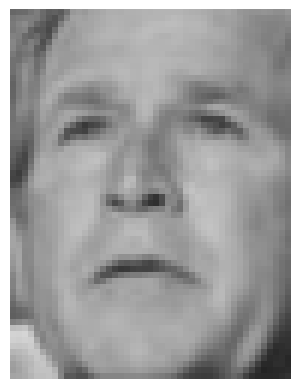

In [85]:
import cv2
import matplotlib.pyplot as plt

train_img = x_train[np.random.randint(0,len(x_train))].reshape(h, w)   
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)
plt.imshow(train_img)
plt.axis('off')

Example test image.

(np.float64(-0.5), np.float64(46.5), np.float64(61.5), np.float64(-0.5))

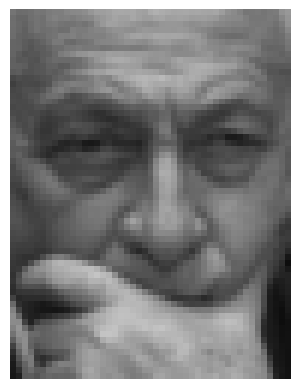

In [86]:
import cv2
import matplotlib.pyplot as plt

train_img = x_test[np.random.randint(0,len(x_test))].reshape(h, w)   
train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)
plt.imshow(train_img)
plt.axis('off')

## The Model

In [87]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        16
           1       0.82      0.79      0.80        47
           2       1.00      0.33      0.50        24
           3       0.58      0.98      0.73       106
           4       0.86      0.27      0.41        22
           5       1.00      0.21      0.35        14
           6       0.67      0.34      0.45        29

    accuracy                           0.66       258
   macro avg       0.85      0.43      0.48       258
weighted avg       0.75      0.66      0.61       258



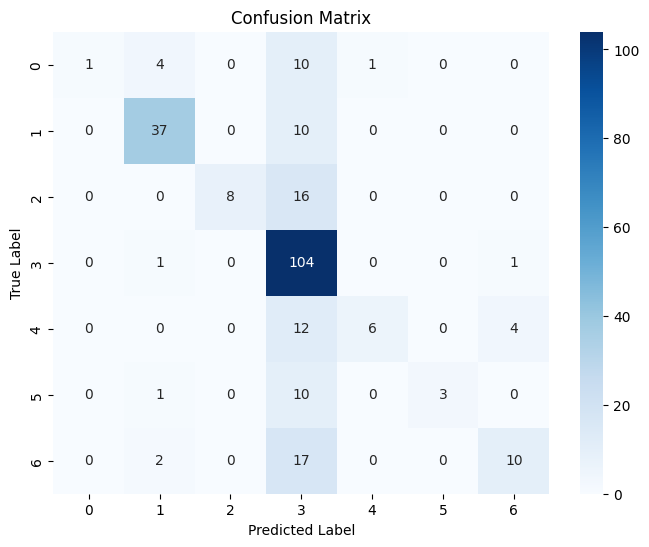

Precision: 0.75
Recall: 0.66
F-Score: 0.61
[3.46637695e-03 2.97983898e-03 2.93768775e-03 ... 1.17474866e-04
 1.14041523e-04 9.92665682e-05]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, precision_recall_fscore_support

# Performance on test data
y_pred = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred))
cf_data = confusion_matrix(y_test, y_pred)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_data, annot=True, fmt='d', cmap='Blues',)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F-Score: {:.2f}".format(fscore))


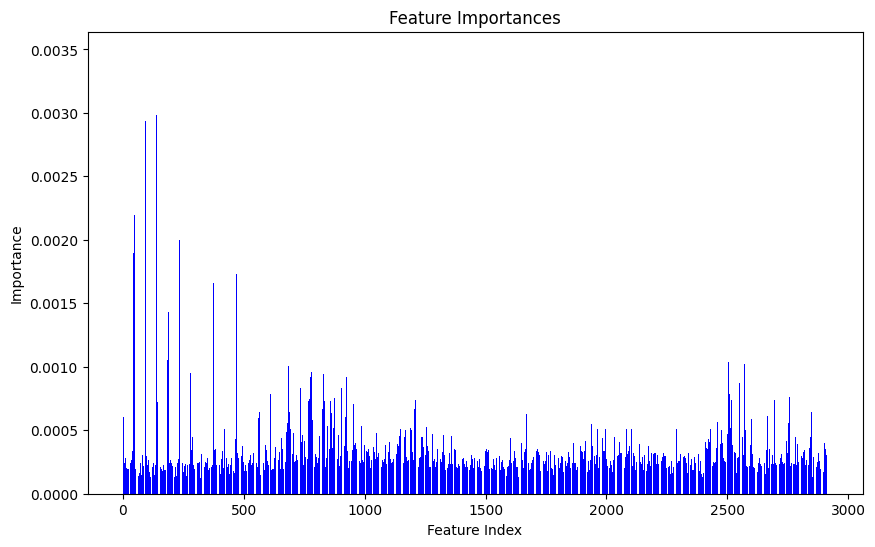

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_clf.feature_importances_)), rf_clf.feature_importances_, color='blue', align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### PCA on the features

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)